In [1]:
import numpy as np
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from category_encoders import OneHotEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [2]:
df_train = pd.read_csv('../data/raw/train.csv',)
df_test = pd.read_csv('../data/raw/test.csv',)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Descriptive Statistics

Descriptive statistics are a set of methods used to summarize and condense data, providing a quick overview of its key characteristics without delving into intricate details. They are fundamental tools for exploring and understanding data in various fields, including data science, statistics, and research.

Here's a breakdown of key concepts:

__Types of Descriptive Statistics__:

1) __Measures of Central Tendency__: These represent the central value of a dataset, indicating where most data points fall. Examples include:\
        __Mean (Average)__: The sum of all values divided by the number of values.\
        __Median__: The value that divides the data into two halves, with an equal number of values above and below it.\
        __Mode__: The most frequent value in the data.

2) Measures of Dispersion: These quantify how spread out the data is around the central value. Examples include:\
       __Range__: The difference between the largest and smallest values.\
       __Variance__: The average squared deviation from the mean.\
       __Standard Deviation__: The square root of the variance, indicating how much data points deviate from the mean.

3) Measures of Shape: These describe the overall distribution of the data, such as symmetry, skewness, and kurtosis. Examples include:\
        __Histogram__: A bar graph showing the frequency of values within intervals.\
        __Boxplot__: A graphical representation summarizing the median, quartiles, and outliers.

4) Other Descriptive Statistics: These include measures like:\
        __Percentiles__: Divide data into equal-sized groups, indicating the value at each percentile.\
        __Outliers__: Data points significantly different from the rest, potentially indicating errors or special cases.

__Applications of Descriptive Statistics__:

* *Data Cleaning*: Identifying missing values, outliers, or inconsistencies.
* *Feature Engineering*: Preparing data for machine learning models.
* *Exploratory Data Analysis (EDA)*: Gaining insights into data patterns and trends.
* *Hypothesis Testing*: Providing context for statistical tests.
* *Reporting and Communication*: Summarizing data concisely and effectively.

Benefits of Using Descriptive Statistics:

* *Ease of Interpretation*: Simple and understandable, even without advanced statistical knowledge.
* *Efficiency*: Quickly summarize large datasets without manual analysis.
* *Foundation for Further Analysis*: Provide a starting point for more complex statistical methods.

Choosing the Right Statistics:

The appropriate descriptive statistics depend on the data type, research question, and desired level of detail. For example, the mean is suitable for continuous data, while the median is robust to outliers.

Additional Tips:

* Visualizations like histograms and boxplots can complement descriptive statistics for clearer understanding.
* Be aware of limitations, such as not capturing the full complexity of the data.
* Always consider the context and purpose when interpreting descriptive statistics.

# Train dataset

In [3]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Test dataset

In [7]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [9]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [10]:
print(f"Length of the df_train is: {len(df_train)}")

Length of the df_train is: 891


# Types Of Features
## Categorical Features:

A categorical variable is one that has two or more categories and each value in that feature can be categorised by them.For example, gender is a categorical variable having two categories (male and female). Now we cannot sort or give any ordering to such variables. They are also known as Nominal Variables.\
Categorical Features in the dataset: __Sex__,__Embarked__.

## Ordinal Features:

An ordinal variable is similar to categorical values, but the difference between them is that we can have relative ordering or sorting between the values. For eg: If we have a feature like Height with values Tall, Medium, Short, then Height is a ordinal variable. Here we can have a relative sort in the variable.\
Ordinal Features in the dataset: __PClass__

## Continous Feature:

A feature is said to be continous if it can take values between any two points or between the minimum or maximum values in the features column.\
Continous Features in the dataset: __Age__


# Column Description
__PassengerId__: unique id number to each passenger\
__Survived__: passenger survive(1) or died(0)\
__Pclass__: passenger class\
__Name__: name\
__Sex__: gender of passenger\
__Age__: age of passenger\
__SibSp__: number of siblings/spouses\
__Parch__: number of parents/children\
__Ticket__: ticket number\
__Fare__: amount of money spent on ticket\
__Cabin__: cabin category\
__Embarked__: port where passenger embarked (C = Cherbourg, Q = Queenstown, S = Southampton)

In [11]:
len(df_train.columns.values)

12

In [12]:
#df_train.drop(columns = ['PassengerId', 'Ticket', 'Name', 'Cabin'], inplace=True)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: >

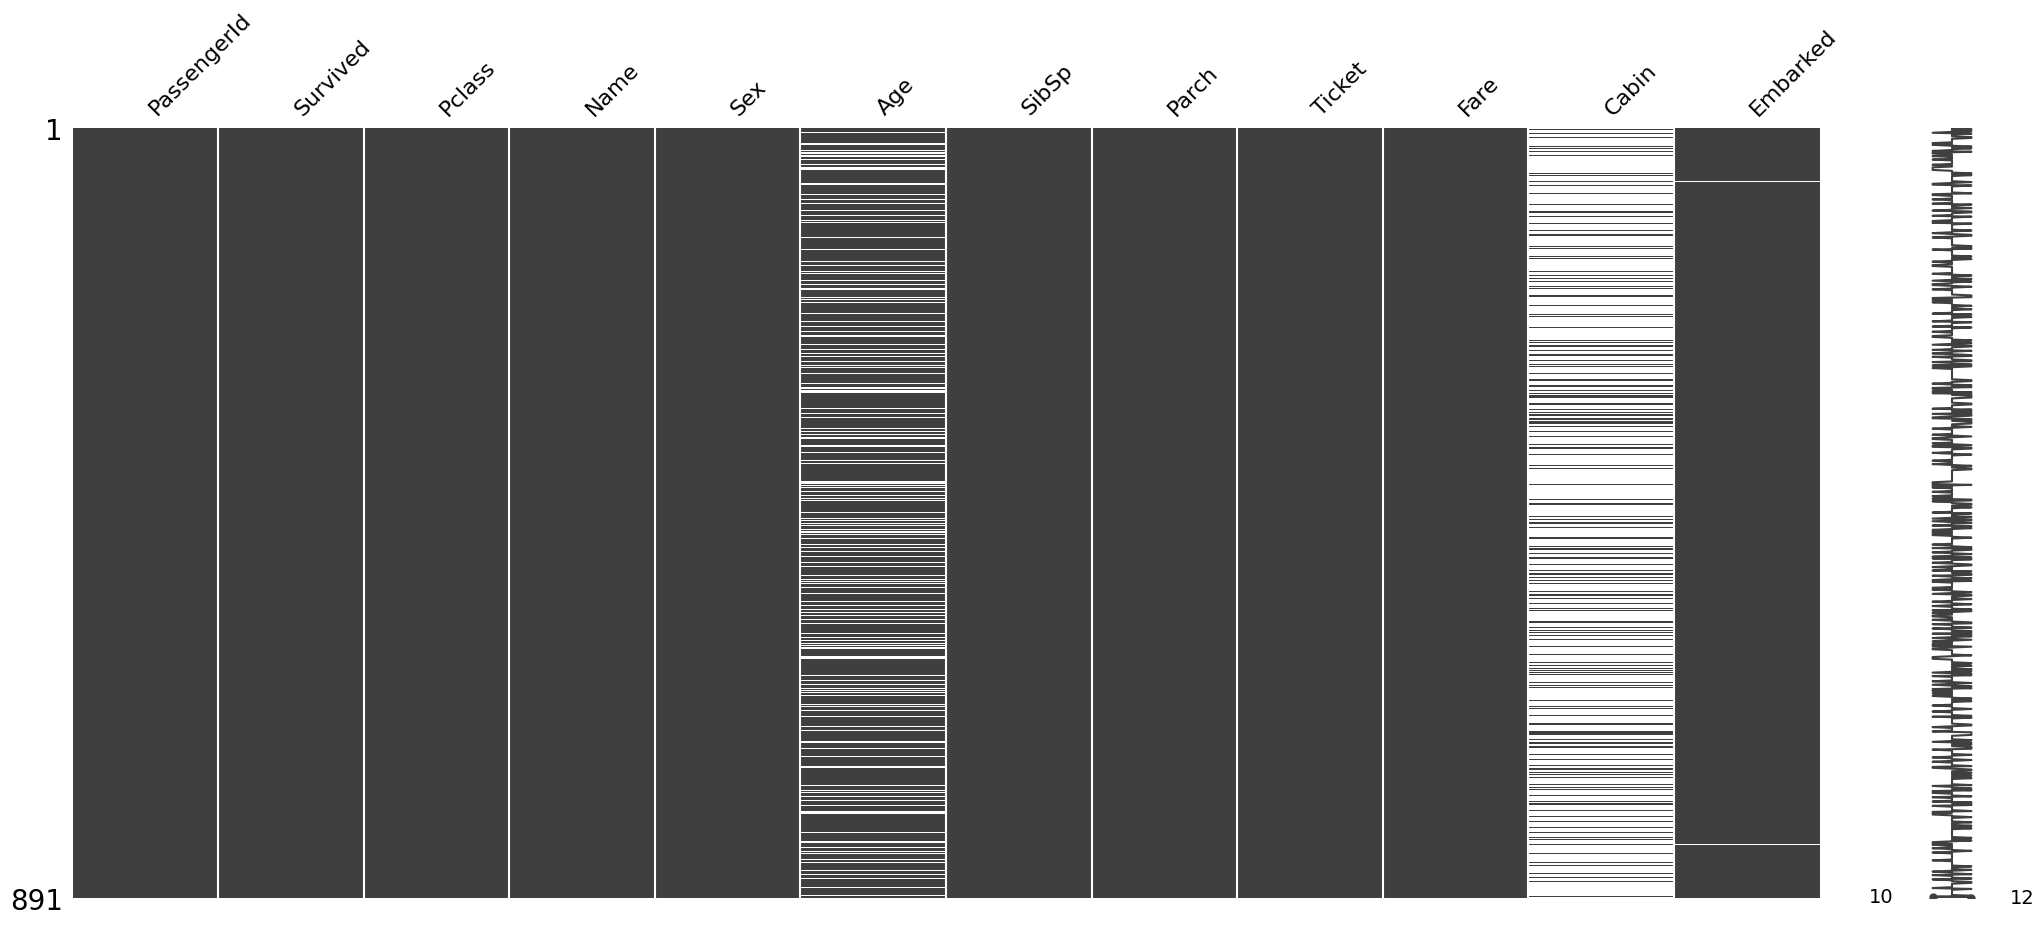

In [13]:
# Assuming df is your DataFrame
# You can replace df with your actual DataFrame name
msno.matrix(df_train)

In [14]:
numerical_columns = df_train.select_dtypes(include=['int', 'float']).columns
categorical_columns = df_train.select_dtypes(include=['object']).columns

In [15]:
print(f"numerical columns: {list(numerical_columns)}")
print(f"categorical columns: {list(categorical_columns)}")

numerical columns: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
categorical columns: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [16]:
# Create a pie chart
def pie_chart(column_name):
    var_dict   = df_train[column_name].value_counts().to_dict()
    col_values = var_dict.values()
    col_keys   = var_dict.keys()
    plt.figure(figsize=(4, 4))  # Adjust the figure size as needed
    plt.pie(col_values, labels=col_keys, autopct="%1.1f%%")  # Customize options
    
    # Display the pie chart
    plt.title(f"Pie Chart of {column_name}")
    plt.show()

In [17]:
def bar_plot(df, variable):
    """
        input: variable ex: "Sex"
        output: bar plot & value count
    """
    # get feature
    var = df[variable]
    # count number of categorical variable(value/sample)
    varValue = var.value_counts()
    
    # visualize
    plt.figure(figsize = (6,3))
    plt.bar(varValue.index, varValue, color = 'orange')
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}".format(varValue))

In [18]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    sns.histplot(df_train[variable], kde=True, bins=50)  # Histogram
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

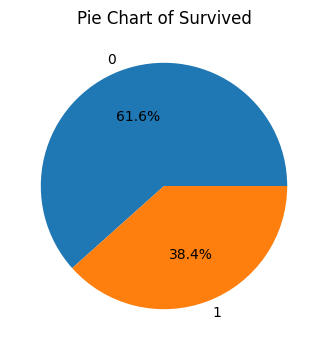

In [19]:
pie_chart("Survived")

Total samples are 891 or 40% of the actual number of passengers on board the Titanic (2,224)\
Survived is a categorical feature with 0 or 1 values. \
Around 38% samples survived representative of the actual survival rate at 32%.


## __Sex__

In [20]:
df_train["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

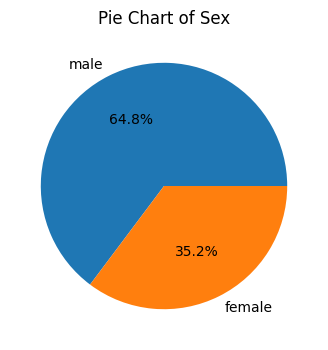

In [21]:
pie_chart("Sex")

Of 891 people boarded on ship, there are 64.8% male (577 men), and 35.2% female (314 women).

In [22]:
eg=df_train[["Survived", "Sex"]].groupby(["Sex"], as_index = False).value_counts().sort_values(by="Sex",ascending = False)
#eg["count"] = round(eg["count"]*100/eg["count"].sum(),2)
eg

,Sex,Survived,count
2,male,0,468
3,male,1,109
0,female,1,233
1,female,0,81


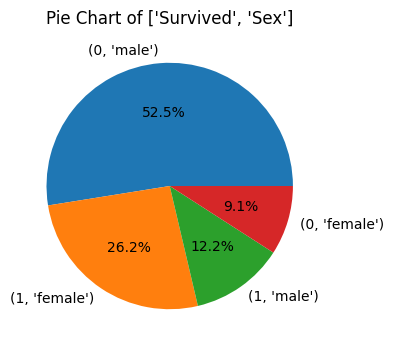

In [23]:
col = ["Survived", "Sex"]
pie_chart(col)

Of 891 people boarded on ship, 64.8% are men. 52.5% men died, and 12.2% men survived. while only 9.1% female died and 26.2% female survived.

## __Pclass__: Passengerclass

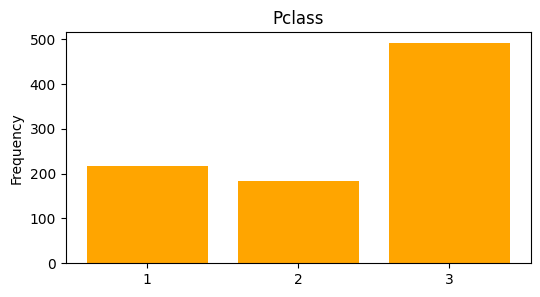

Pclass
3    491
1    216
2    184
Name: count, dtype: int64


In [24]:
bar_plot(df_train,"Pclass")

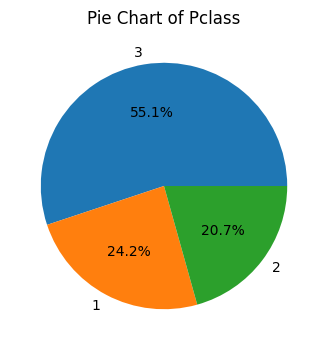

In [25]:
pie_chart("Pclass")

Of 891 people, majority of them ie. 55.1% were in 3rd class, followed by 1st class ie 24.2%, and then 20.7% in 2nd class

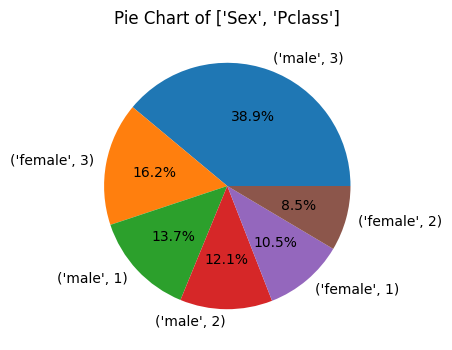

In [26]:
col = ["Sex", "Pclass"]
#for col_names in col:
pie_chart(col)

Combining sex and Passengerclass, out of total people aboard Titanic, 38.9% of them were men in 3rd class, followed by 16.2% femaled in 3rd class. The least were female in 2nd class 

In [27]:
# Plcass vs Survived
df_train[["Pclass","Survived"]].groupby(["Pclass"], as_index = False).value_counts().sort_values(by="Survived",ascending = False)

,Pclass,Survived,count
0,1,1,136
3,2,1,87
5,3,1,119
1,1,0,80
2,2,0,97
4,3,0,372


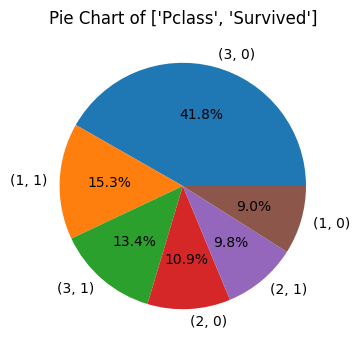

In [28]:
col = ["Pclass", "Survived"]
#for col_names in col:
pie_chart(col)

## __Embarked__

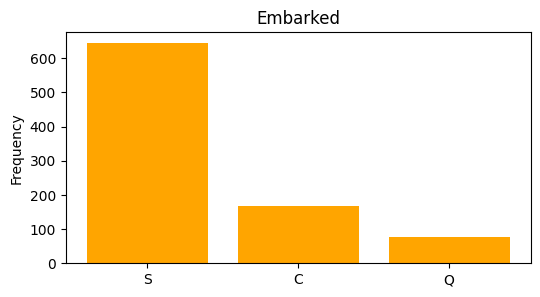

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


In [29]:
bar_plot(df_train,"Embarked")

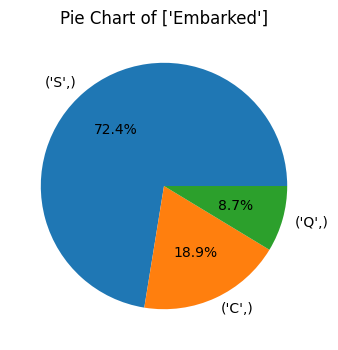

In [30]:
col = ["Embarked"]
#for col_names in col:
pie_chart(col)

Most of the people embarked from Southampton. Out of 891 people, 72.4% or 644 people embarked from Southampton, followed by 18.9% or 168 people from Cherbourg, and least is 8.7% or 77 people from Queenstown.

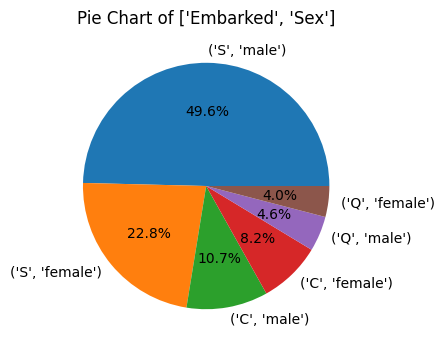

In [31]:
col = ["Embarked", "Sex"]
#for col_names in col:
pie_chart(col)

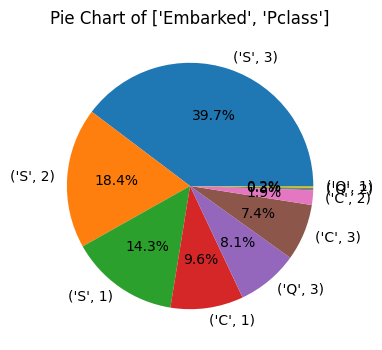

In [32]:
col = ["Embarked", "Pclass"]
#for col_names in col:
pie_chart(col)

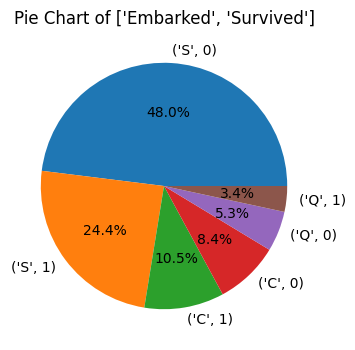

In [33]:
col = ["Embarked", "Survived"]
#for col_names in col:
pie_chart(col)

Most of the 891 people, 72.4% embarked from Southampton, out of which 48% died and 24.4% survived. Followed by 18.9% people from Cherbourg and 8.7% from Queenstown. 

## __Parch__: 

In [34]:
df_train["Family_size"] = df_train["SibSp"]+ df_train["Pclass"] + 1
#df_train[["Family_size","Survived"]].groupby(["Family_size"], as_index = False).value_counts()
df_train["Family_size"].value_counts()

Family_size
4     411
3     191
2     137
5      94
8      18
6      16
7      12
12      7
9       5
Name: count, dtype: int64

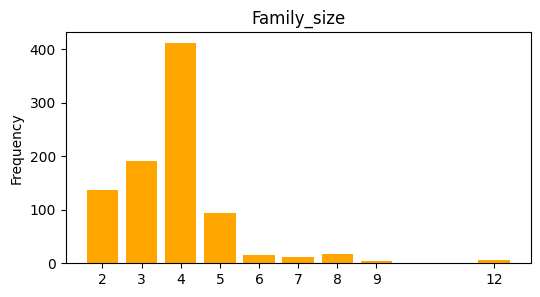

Family_size
4     411
3     191
2     137
5      94
8      18
6      16
7      12
12      7
9       5
Name: count, dtype: int64


In [35]:
col = df_train["Family_size"]#"Survived",
#for col_names in col:
bar_plot(df_train,"Family_size")

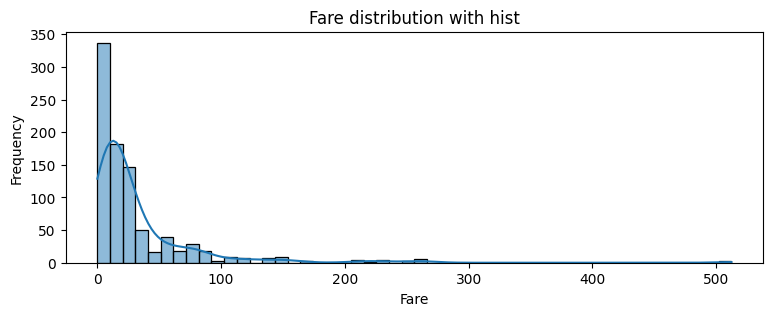

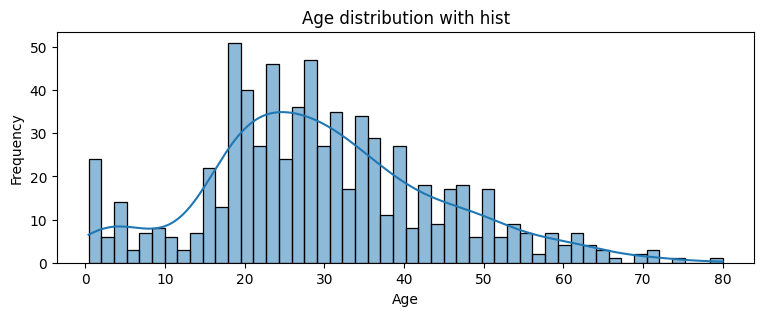

In [36]:
numericVar = ["Fare", "Age"]
for n in numericVar:
    plot_hist(n)

## __SibSp__

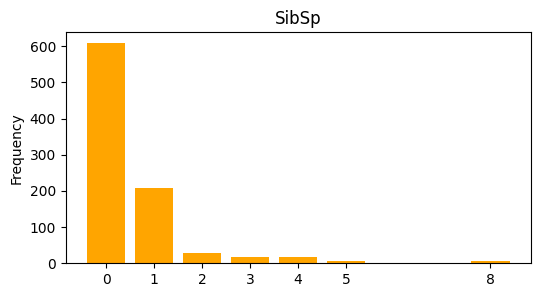

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64


In [38]:
bar_plot(df_train,"SibSp")

In [39]:
# Sibsp vs Survived
df_train[["SibSp","Survived"]].groupby(["SibSp"], as_index = False).mean().sort_values(by="Survived",ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [40]:
# Sibsp vs Survived
df_train[["SibSp","Survived"]].groupby(["SibSp"], as_index = False).value_counts().sort_values(by="Survived",ascending = False)

,SibSp,Survived,count
1,0,1,210
2,1,1,112
5,2,1,13
7,3,1,4
9,4,1,3
0,0,0,398
3,1,0,97
4,2,0,15
6,3,0,12
8,4,0,15


## __Parch__

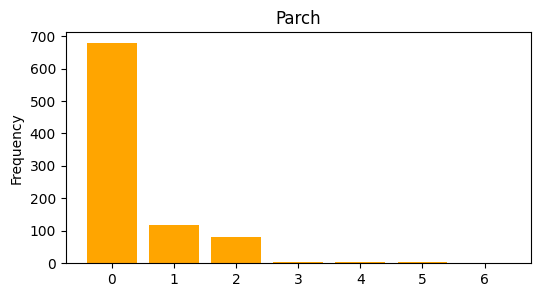

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64


In [42]:
bar_plot(df_train,"Parch")

In [43]:
round(df_train["Parch"].value_counts()/len(df_train),2)

Parch
0    0.76
1    0.13
2    0.09
5    0.01
3    0.01
4    0.00
6    0.00
Name: count, dtype: float64

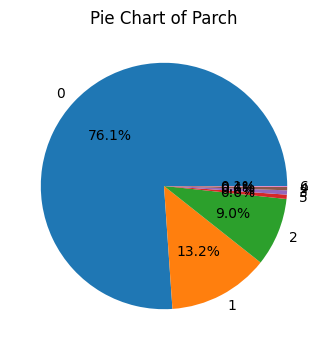

In [44]:
pie_chart("Parch")

Most passengers (> 75%) did not travel with parents or children.

In [45]:
# Parch vs Survived
parch =round(df_train[["Parch","Survived"]].groupby(["Parch"], as_index = False).mean().sort_values(by="Survived",ascending = False),2)
parch

,Parch,Survived
3,3,0.60
1,1,0.55
2,2,0.50
0,0,0.34
5,5,0.20
4,4,0.00
6,6,0.00


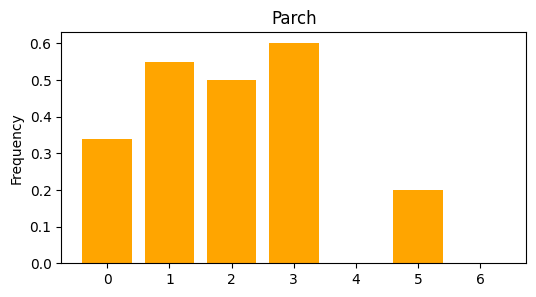

3    0.60
1    0.55
2    0.50
0    0.34
5    0.20
4    0.00
6    0.00
Name: Survived, dtype: float64


In [46]:
# get feature
var = parch["Parch"]
# count number of categorical variable(value/sample)
varValue = parch["Survived"]

# visualize
plt.figure(figsize = (6,3))
plt.bar(varValue.index, varValue, color = 'orange')
plt.xticks(varValue.index, varValue.index.values)
plt.ylabel("Frequency")
plt.title("Parch")
plt.show()
print("{}".format(varValue))

The following observations are made until here:
1) __PassengerId__: It is categorical nominal variable. ID of each passenger, with high standar deviation.
2) __Survived__: Target vector, with binary outputs, 0 and 1. 0 means didnt survive, and 1 means survived.
3) __Pclass__: Passenger class for each passenger. has 3 distinct values, 1, 2, and 3. 

## Assumtions based on data analysis

We arrive at following assumptions based on data analysis done so far. We may validate these assumptions further before taking appropriate actions.

## Correlating
We want to know how well does each feature correlate with Survival. We want to do this early in our project and match these quick correlations with modelled correlations later in the project.

## Completing
We may want to complete Age feature as it is definitely correlated to survival. We may want to complete the Embarked feature as it may also correlate with survival or another important feature.

## Correcting
Ticket feature may be dropped from our analysis as it contains high ratio of duplicates (22%) and there may not be a correlation between Ticket and survival.
* Cabin feature may be dropped as it is highly incomplete or contains many null values both in training and test dataset.
* PassengerId may be dropped from training dataset as it does not contribute to survival.
* Name feature is relatively non-standard, may not contribute directly to survival, so maybe dropped.

## Creating
* We may want to create a new feature called Family based on Parch and SibSp to get total count of family members on board.
* We may want to engineer the Name feature to extract Title as a new feature.
* We may want to create new feature for Age bands. This turns a continous numerical feature into an ordinal categorical feature.
* We may also want to create a Fare range feature if it helps our analysis.

## Classifying
We may also add to our assumptions based on the problem description noted earlier.

* Women (Sex=female) were more likely to have survived.
* Children (Age<?) were more likely to have survived.
* The upper-class passengers (Pclass=1) were more likely to have survived.

## Analyze by pivoting features

To confirm some of our observations and assumptions, we can quickly analyze our feature correlations by pivoting features against each other. We can only do so at this stage for features which do not have any empty values. It also makes sense doing so only for features which are categorical (Sex), ordinal (Pclass) or discrete (SibSp, Parch) type.

* Pclass We observe significant correlation (>0.5) among Pclass=1 and Survived (classifying #3). We decide to include this feature in our model.
* Sex We confirm the observation during problem definition that Sex=female had very high survival rate at 74% (classifying #1).
* SibSp and Parch These features have zero correlation for certain values. It may be best to derive a feature or a set of features from these individual features (creating #1).

## __Finding Outliers__

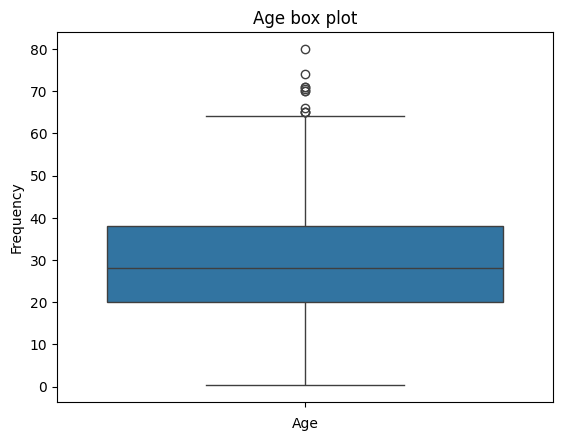

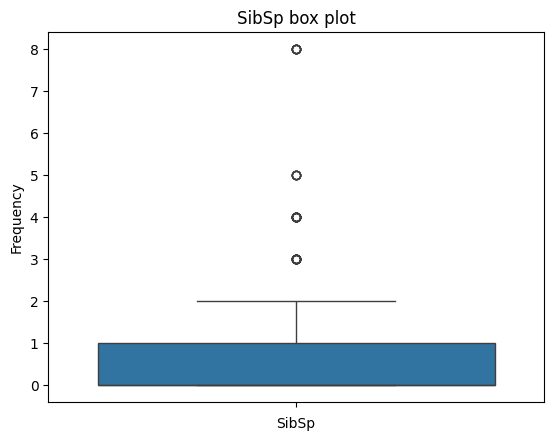

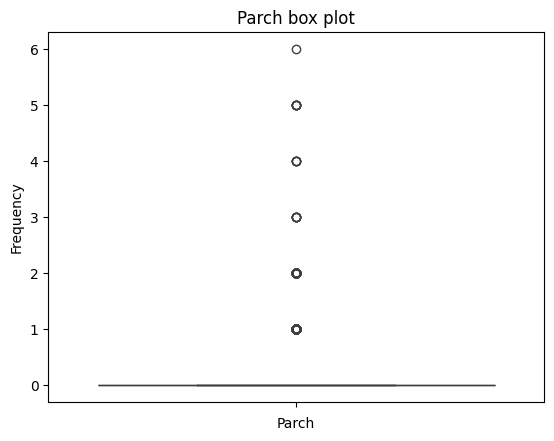

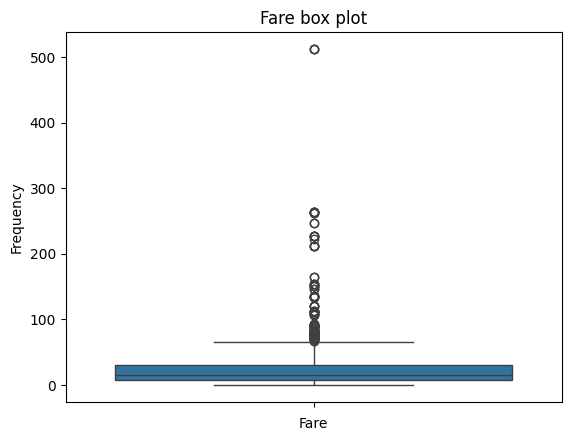

In [47]:
column_names = ["Age","SibSp","Parch","Fare"]
for column_name in column_names:
    sns.boxplot(y=column_name, data=df_train)
    plt.xlabel(column_name)
    plt.ylabel("Frequency")
    plt.title("{} box plot".format(column_name))
    plt.show()

In [48]:
def detect_outlier_indices(df,column_names):
    outlier_indices = []
    for column_name in column_names:
        # Calculate the interquartile range (IQR) for each numerical column
        Q1 = df[column_name].quantile(0.25)
        Q3 = df[column_name].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Find rows where any numerical column value falls outside of the defined bounds
        outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)].index
        outlier_indices.extend(outliers)
        
    # Print rows containing outliers
    outlier_indices = pd.Series(outlier_indices).value_counts()
    outlier_indices = list(i for i, v in outlier_indices.items() if v > 2)
    return outlier_indices

In [49]:
column_names = ["Age","SibSp","Parch","Fare"]
detect_outlier_indices(df_train,column_names)

[159, 745, 180, 88, 201, 27, 341, 863, 324, 846, 792]

In [50]:
df_train.iloc[detect_outlier_indices(df_train,column_names)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S,12
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.00,B22,S,3
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S,12
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S,5
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S,12
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S,5
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S,5
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S,12
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S,12
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S,12


In [51]:
column_names = ["Age","SibSp","Parch","Fare"]
#df_train = df_train.drop(detect_outlier_indices(df_train,column_names), axis=0).reset_index(drop = True)

In [52]:
print(f"Length of the df_train after removing outliers is:{len(df_train)}")

Length of the df_train after removing outliers is:891


In [53]:
len(df_test)

418

# CORRELATION

Heatmaps are commonly used to visualize the correlation between features in a dataset. In the context of correlation visualization:

1) Color Intensity: The intensity of the colors in the heatmap cells represents the strength of the correlation between the corresponding pairs of features. For example, strong positive correlations may be represented by darker colors, while weaker correlations or negative correlations may be represented by lighter colors.

2) Color Gradient: Heatmaps typically use a color gradient to represent the range of correlation values. For instance, a gradient may range from dark blue (indicating strong negative correlation) through white (indicating no correlation) to dark red (indicating strong positive correlation).

3) Symmetry: Since correlation is a symmetric measure (the correlation between Feature A and Feature B is the same as the correlation between Feature B and Feature A), heatmaps of correlation matrices are often symmetric along the diagonal.

4) Diagonal: The diagonal cells of the heatmap typically represent the correlation of each feature with itself, which is always 1. These cells are often excluded or shaded differently to avoid visual clutter.

By visualizing the correlation matrix of features using a heatmap, you can quickly identify which features are strongly correlated, positively or negatively, and which features are weakly correlated or uncorrelated. This can be valuable for feature selection, identifying multicollinearity, or understanding the relationships between variables in your dataset.\
Heatmaps primarily show linear correlation between features. They visualize the pairwise correlation coefficients between variables in a dataset, which measure the strength and direction of the linear relationship between two variables. These correlation coefficients, such as Pearson's correlation coefficient, quantify the degree to which two variables change together in a linear fashion.

The correlation coefficient quantifies the strength and direction of the linear relationship between two variables. It takes values between -1 and 1, where:

* Positive Correlation (r > 0): Indicates that as one variable increases, the other variable also tends to increase. A value close to 1 indicates a strong positive correlation, while a value closer to 0 indicates a weaker positive correlation.

* Negative Correlation (r < 0): Indicates that as one variable increases, the other variable tends to decrease. A value close to -1 indicates a strong negative correlation, while a value closer to 0 indicates a weaker negative correlation.

* No Correlation (r = 0): Indicates that there is no linear relationship between the variables. However, it's important to note that there could still be other types of relationships, such as nonlinear or non-monotonic relationships, that are not captured by the correlation coefficient.

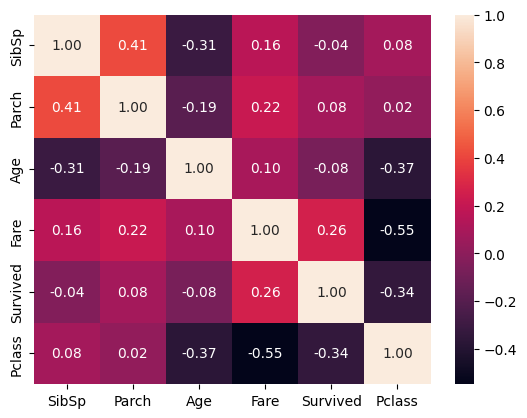

In [54]:
list1 = ["SibSp", "Parch", "Age", "Fare", "Survived", "Pclass"]
sns.heatmap(df_train[list1].corr(), annot = True, fmt = ".2f")
plt.show()

Fare feature seems to have correlation with survived feature (0.26).

__Catplot__ and __FacetGrid__ are functionalities provided by Seaborn, a popular data visualization library in Python that is built on top of matplotlib. It offers a high-level interface for drawing attractive and informative statistical graphics. These tools are particularly useful for creating complex multi-plot grids that share axes and show relationships between variables across multiple dimensions.
catplot.

catplot is a function in Seaborn that is used to create categorical plots, making it easier to visualize the distribution of data across different categories. It is a high-level interface for drawing categorical plots onto a FacetGrid. The catplot function provides access to several axes-level functions for plotting categorical data, including:

* stripplot() (with kind="strip"; the default)
* swarmplot() (with kind="swarm")
* boxplot() (with kind="box")
* violinplot() (with kind="violin")
* boxenplot() (with kind="boxen")
* pointplot() (with kind="point")
* barplot() (with kind="bar")
* countplot() (with kind="count")

By providing a high-level interface, catplot makes it straightforward to create complex visualizations that include faceting (i.e., creating subplots based on the values of one or more categorical variables) and layering of different plot types

__FacetGrid__ is a class in Seaborn used for creating grids of plots based on one or more categorical variables. It is a powerful tool for creating multiple plots that share the same x or y axes. FacetGrid itself doesn't create plots but rather sets up a framework that makes it easy to map dataset variables to plots on a grid that can include complex facetting information.

Once a FacetGrid object has been created, you can use the map method to apply a plotting function to each subplot in the grid. This allows for custom plots and extensive flexibility.

FacetGrid is more customizable and lower-level than catplot, which means it can be a bit more complex to use but also more powerful when you need that extra level of control or when creating plots that don't fit into the catplot framework.

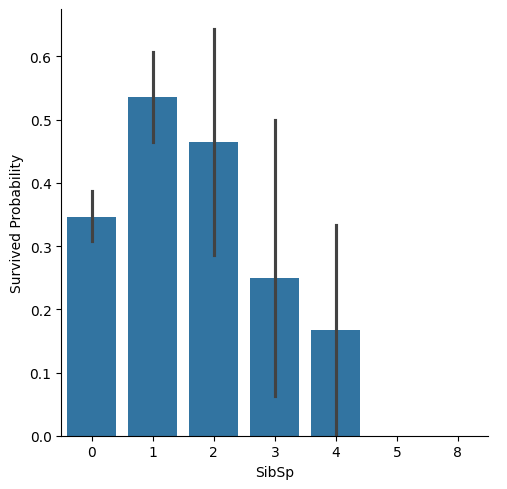

In [55]:
g = sns.catplot(x = "SibSp", y = "Survived", data = df_train, kind = "bar")
g.set_ylabels("Survived Probability")
plt.show()

* Having a lot of SibSp have less chance to survive.
* if sibsp == 0 or 1 or 2, passenger has more chance to survive
* we can consider a new feature describing these categories.

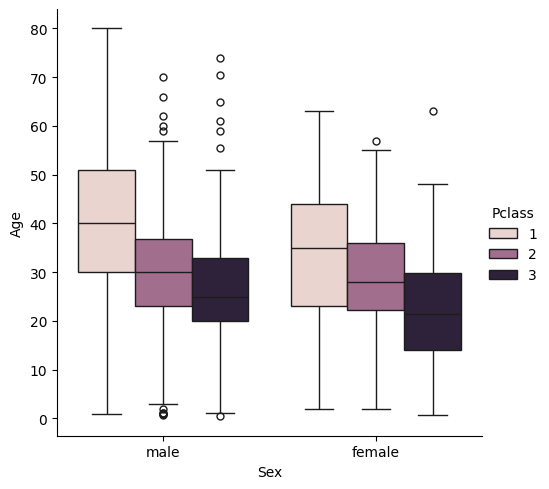

In [56]:
sns.catplot(x = "Sex", y = "Age", hue = "Pclass",data = df_train, kind = "box")
plt.show()

1st class passengers are older than 2nd, and 2nd is older than 3rd class.


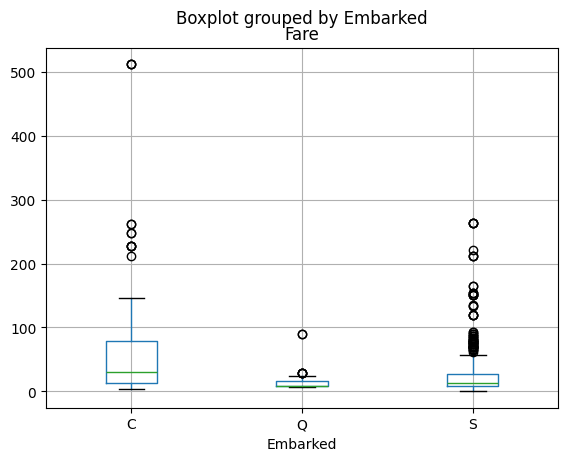

In [57]:
df_train.boxplot(column="Fare",by = "Embarked")
plt.show()

# SibSp -- Survived

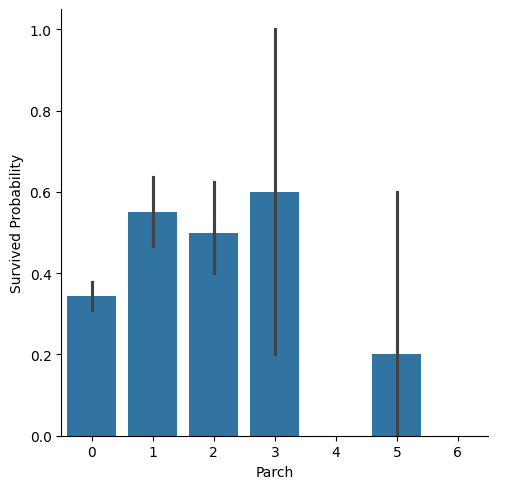

In [58]:
g = sns.catplot(x = "Parch", y = "Survived", kind = "bar", data = df_train)
g.set_ylabels("Survived Probability")
plt.show()

# Parch -- Survived

* Sibsp and parch can be used for new feature extraction with th = 3
* Small familes have more chance to survive.
* There is a std in survival of passenger with parch = 3

# Age -- Survived

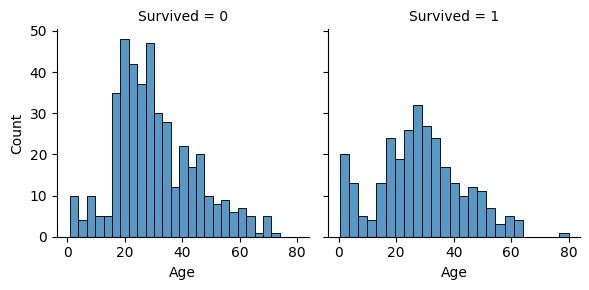

In [59]:
g = sns.FacetGrid(df_train, col = "Survived")
g.map(sns.histplot, "Age", bins = 25)
plt.show();

### Observations
* age <= 10 has a high survival rate.
* oldest passengers (80) survived.
* large number of 20-30 years old did not survive.
* most passengers are in 15-35 age range.

### Decisions
* use age feature in training.
* use age distribution for missing value of age.
* We should band age groups

# Pclass -- Survived -- Age

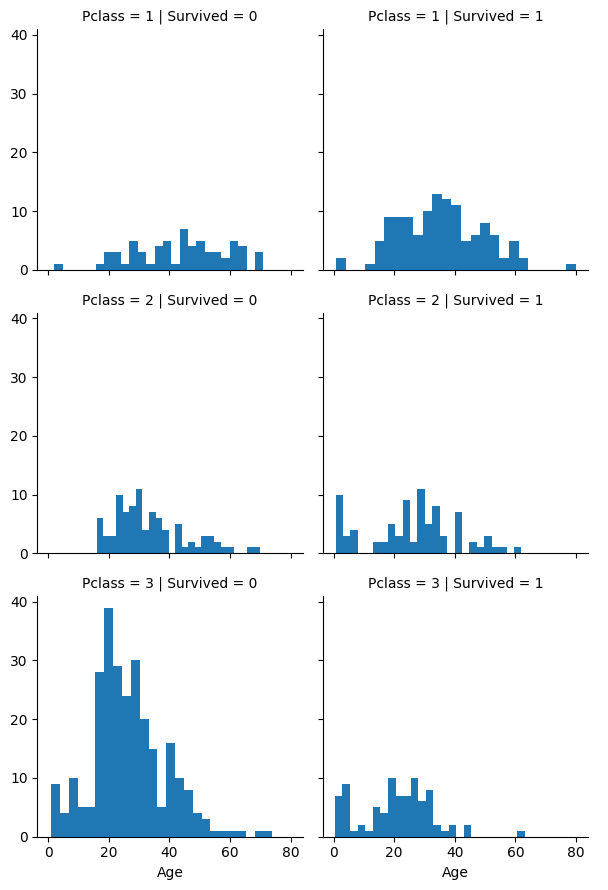

In [60]:
g = sns.FacetGrid(df_train, col = "Survived", row = "Pclass")
g.map(plt.hist, "Age", bins = 25)
g.add_legend()
plt.show()

### Observations
* Pclass=3 had most passengers, however most did not survive.
* Infant passengers in Pclass=2 and Pclass=3 mostly survived.
* Most passengers in Pclass=1 survived.
* Pclass varies in terms of Age distribution of passengers.

### Decisions
* pclass is important feature for model training.

# Embarked -- Sex -- Pclass -- Survived

C:\Users\Nithish P T\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\Nithish P T\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


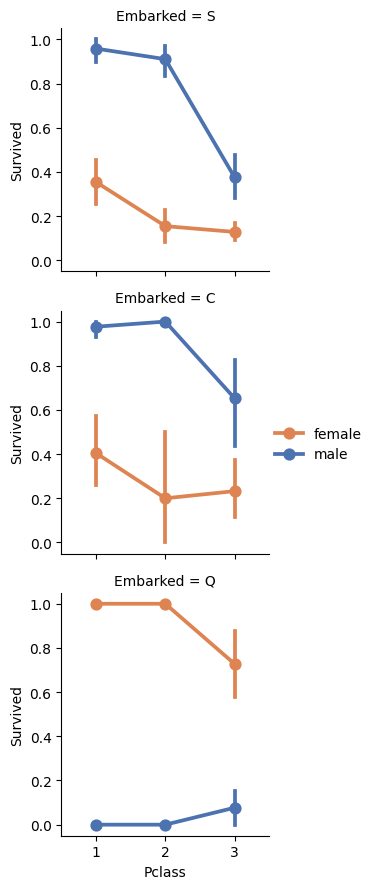

In [61]:
g = sns.FacetGrid(df_train, row = "Embarked")
g.map(sns.pointplot, "Pclass","Survived","Sex", palette="deep" )
g.add_legend()
plt.show()

* Female passengers have much better survival rate than males.
* Males have better survşval rate in pclass 3 in C.
* Embarked and sex will be used in training.



### Observations.
* Female passengers had much better survival rate than males.
* Exception in Embarked=C where males had higher survival rate. This could be a correlation between Pclass and Embarked and in turn Pclass and Survived, not necessarily direct correlation between Embarked and Survived.
* Males had better survival rate in Pclass=3 when compared with Pclass=2 for C and Q ports.
* Ports of embarkation have varying survival rates for Pclass=3 and among male passengers.

### Decisions.
* Add Sex feature to model training.
* Complete and add Embarked feature to model training.

# Embarked - Sex - Fare - Survived

C:\Users\Nithish P T\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


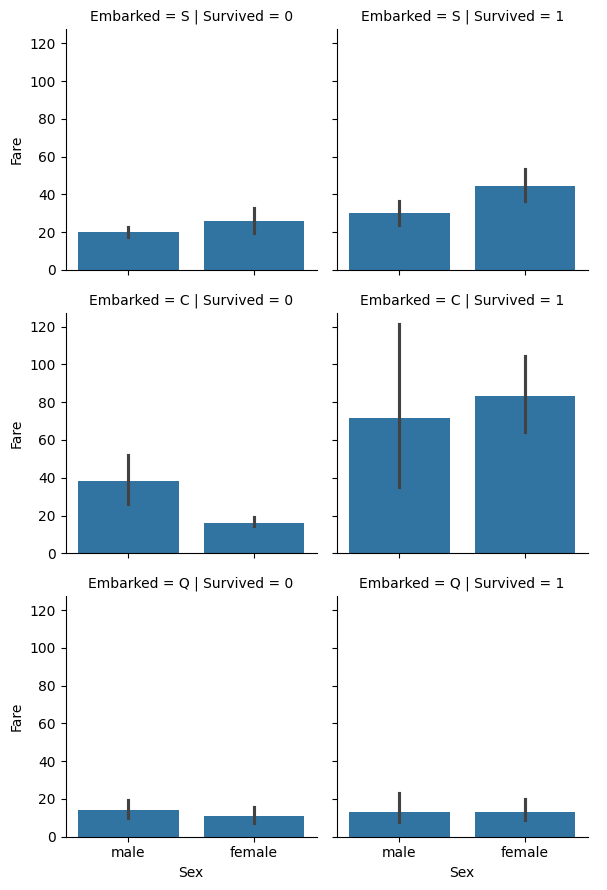

In [62]:
g = sns.FacetGrid(df_train, row = "Embarked", col = "Survived")
g.map(sns.barplot, "Sex", "Fare")
g.add_legend()
plt.show()

### Observations
* Higher fare paying passengers had better survival.
* Port of embarkation correlates with survival rates.

### Decisions
* Consider banding Fare feature.

## Pairgrid plotting

__PairGrid__ is another powerful class provided by Seaborn, a data visualization library in Python. While FacetGrid is designed for plotting conditional relationships across different subsets of the dataset, PairGrid focuses on plotting pairwise relationships between variables in a dataset. Essentially, it creates a grid of Axes such that each variable in the dataset is shared across the y-axes across a single row and the x-axes across a single column.

The main purpose of PairGrid is to visualize the relationships between pairs of variables in a dataset. For each pair of variables, it creates a scatter plot by default, but you can customize it to show different kinds of plots. PairGrid is highly customizable: you can map different plotting functions to the upper triangle, lower triangle, and diagonal of the grid.

PairGrid is especially useful in the exploratory data analysis phase of a project, where you're trying to uncover relationships between variables or identify patterns in your dataset. It provides a compact and informative overview of how each variable relates to every other variable, offering insights that might not be apparent from looking at individual variables in isolation.

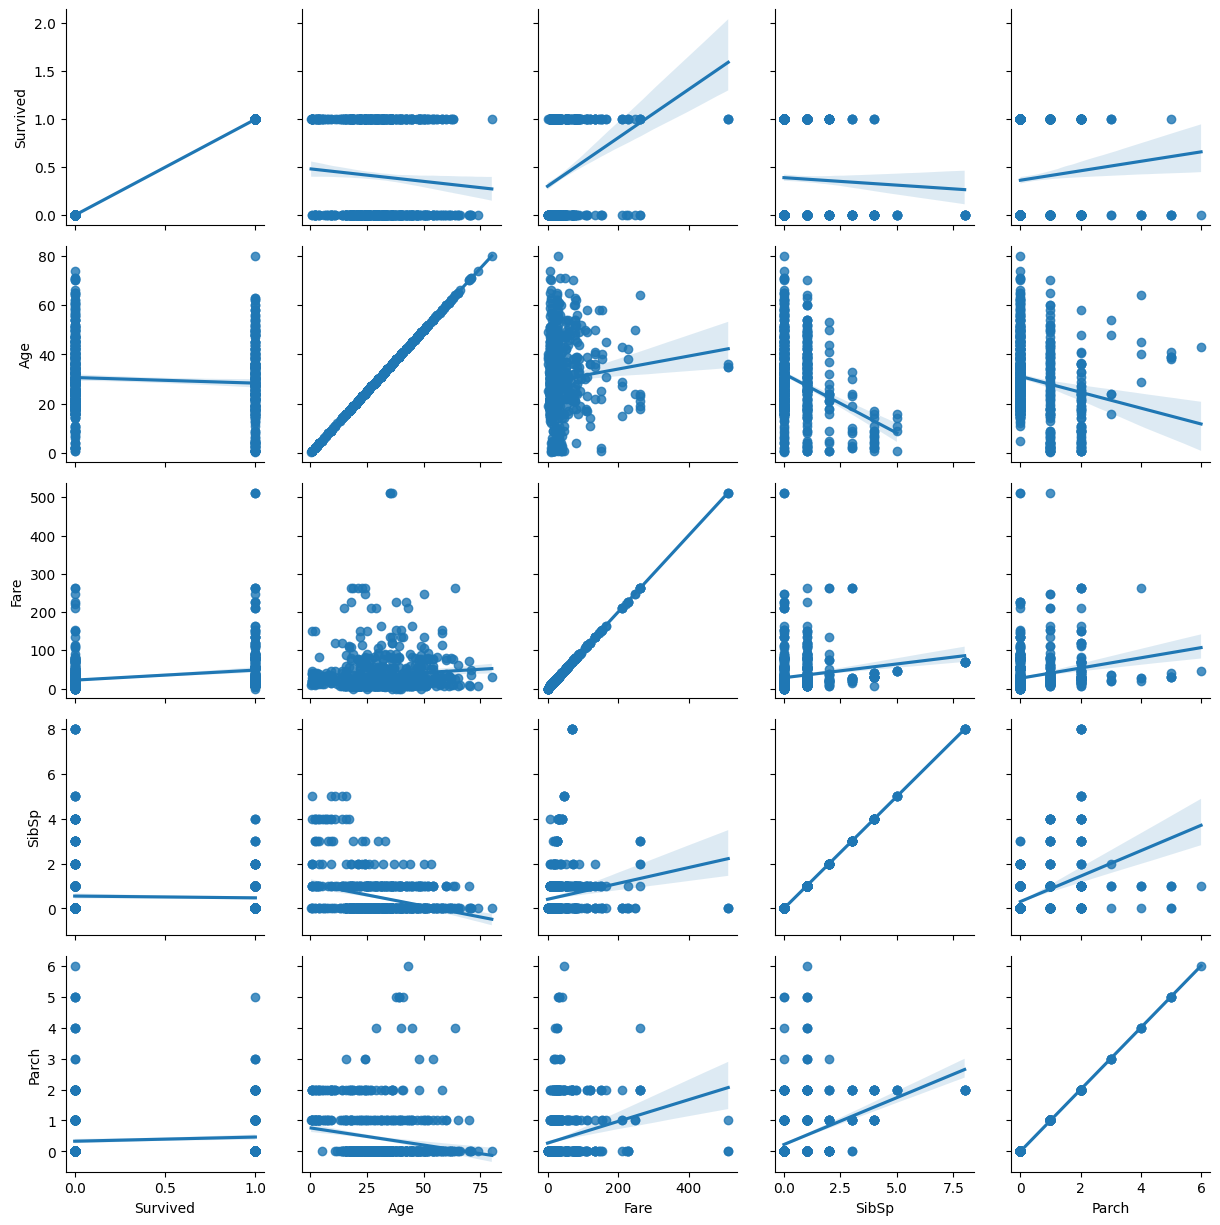

In [63]:
# Regplot
g = sns.PairGrid(df_train[['Survived', 'Age', 'Fare', 'SibSp', 'Parch']])
g.map(sns.regplot)

# MISSING VALUES

In [64]:
df_train.columns[df_train.isnull().any()]

Index(['Age', 'Cabin', 'Embarked'], dtype='object')

In [65]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Family_size      0
dtype: int64

In [66]:
df_train[df_train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,2
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,2


In [67]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# Filling missing features in Age

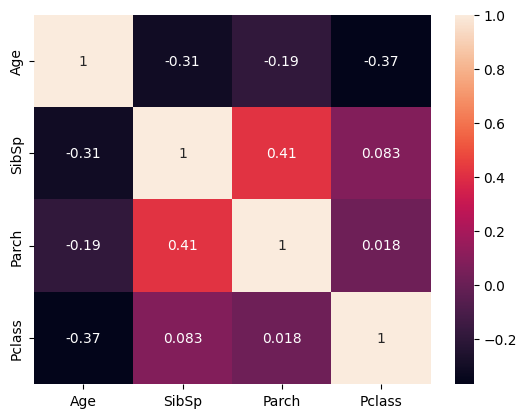

In [68]:
sns.heatmap(df_train[["Age","SibSp","Parch","Pclass"]].corr(), annot = True)
plt.show()

In [69]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Family_size      0
dtype: int64

In [70]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# Concatenation of train and test data

In [71]:
print("Before", df_train.shape, df_test.shape)

#passenger_Id = df_test['PassengerId']
df_test.drop(columns = [ 'Ticket', 'Cabin'], inplace=True)
df_train.drop(columns = [ 'Ticket', 'Cabin'], inplace=True)
df_train_len = len(df_train)
df = pd.concat([df_train,df_test],axis = 0).reset_index(drop = True)

print("After", df_train.shape, df_test.shape, df.shape)

Before (891, 13) (418, 11)
After (891, 11) (418, 9) (1309, 11)


In [72]:
assert len(df_train) + len(df_test) == len(df)

In [73]:
len(df)

1309

In [133]:
index_nan_age = list(df[df["Age"].isnull()].index)
for i in index_nan_age:
    age_pred = df.loc[((df["SibSp"] == df.iloc[i]["SibSp"]) &(df["Parch"] == df.iloc[i]["Parch"])& (df["Pclass"] == df.iloc[i]["Pclass"])), "Age"].median()
    age_med = df["Age"].median()
    if not np.isnan(age_pred):
        df.loc[i, "Age"] = age_pred
    else:
        df.loc[i, "Age"] = age_med

C:\Users\Nithish P T\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


## Filling embarked and Fare columns

In [134]:
df["Embarked"] = df["Embarked"].fillna("C")
df[df["Embarked"].isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked


In [135]:
df[df["Fare"].isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1032,NaN,3,male,60.5,0,0,NaN,S


In [136]:
df["Fare"] = df["Fare"].fillna(np.mean(df[df["Pclass"] == 3]["Fare"]))

In [137]:
df[df["Fare"].isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked


In [155]:
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1298 entries, 0 to 1297
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  880 non-null    float64 
 1   Pclass    1298 non-null   category
 2   Sex       1298 non-null   category
 3   Age       1298 non-null   float64 
 4   SibSp     1298 non-null   int64   
 5   Parch     1298 non-null   int64   
 6   Fare      1298 non-null   float64 
 7   Embarked  1298 non-null   category
dtypes: category(3), float64(3), int64(2)
memory usage: 55.0 KB


## Train - Test Separation

In [142]:
assert (len(df) - df_train_len) == len(df_test)

In [143]:
test = df.loc[df_train_len:]
test.drop(columns=["Survived"], inplace=True)
test.reset_index(drop=True, inplace=True)

C:\Users\Nithish P T\AppData\Local\Temp\ipykernel_12536\419802196.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop(columns=["Survived"], inplace=True)


In [150]:
train = df.loc[:df_train_len-1]

In [145]:
assert len(test.columns) == len(df_test.columns)

In [148]:
test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [151]:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [156]:
test["PassengerId"] = passenger_Idtest

C:\Users\Nithish P T\AppData\Local\Temp\ipykernel_12536\4251641393.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["PassengerId"] = passenger_Id


In [157]:
assert test.columns 

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,PassengerId


In [158]:
test.to_csv("../data/wrangled/test_wrangled.csv", index=False)

In [159]:
train.to_csv("../data/wrangled/train_wrangled.csv", index=False)